<a href="https://colab.research.google.com/github/abhiyantaabhishek/speed_bump/blob/master/yolo_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/abhiyantaabhishek/keras-yolo3
%cd keras-yolo3/
!pip install -r requirements.txt

In [0]:
!mkdir dataset

In [3]:
%cd dataset

/content/keras-yolo3/dataset


In [4]:
!git clone https://github.com/experiencor/raccoon_dataset


Cloning into 'raccoon_dataset'...
remote: Enumerating objects: 646, done.
remote: Total 646 (delta 0), reused 0 (delta 0), pack-reused 646
Receiving objects: 100% (646/646), 48.00 MiB | 41.13 MiB/s, done.
Resolving deltas: 100% (412/412), done.


In [5]:
%cd raccoon_dataset

/content/keras-yolo3/dataset/raccoon_dataset


In [6]:
!ls

 annotations	        images		      test_generate_tfrecord.py
 data		        __init__.py	      test_xml_to_csv.py
'draw boxes.ipynb'      LICENSE		      training
 environment.yml        README.md	      xml_to_csv.py
 generate_tfrecord.py  'split labels.ipynb'


In [0]:
import cv2
import pandas as pd
from PIL import Image

In [0]:
full_labels = pd.read_csv('data/raccoon_labels.csv')

In [9]:
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-1.jpg,650,417,raccoon,81,88,522,408
1,raccoon-10.jpg,450,495,raccoon,130,2,446,488
2,raccoon-100.jpg,960,576,raccoon,548,10,954,520
3,raccoon-101.jpg,640,426,raccoon,86,53,400,356
4,raccoon-102.jpg,259,194,raccoon,1,1,118,152


In [0]:

def draw_boxes(image_name):
    selected_value = full_labels[full_labels.filename == image_name]
    img = cv2.imread('images/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

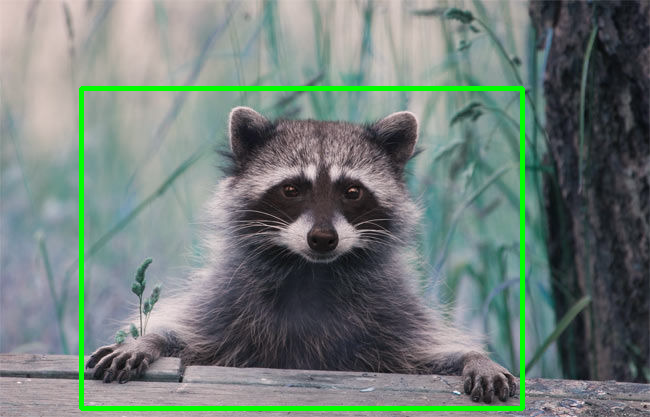

In [11]:
Image.fromarray(draw_boxes('raccoon-1.jpg'))

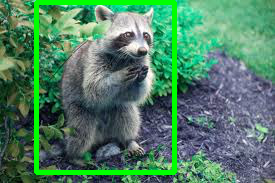

In [12]:

Image.fromarray(draw_boxes('raccoon-50.jpg'))

In [51]:
%cd /content/keras-yolo3/
!ls

/content/keras-yolo3
backend.h5		  __pycache__
callbacks.py		  raccoon.pkl
config.json		  README.md
create_validation_set.sh  requirements.txt
dataset			  train.py
evaluate.py		  utils
gen_anchors.py		  voc.py
generator.py		  yolo3_one_file_to_detect_them_all.py
kangaroo_train.pkl	  yolo.py
LICENSE			  zoo
predict.py


In [0]:
%pycat config.json

In [0]:
!rm config.json

In [59]:
%%writefile config.json

{
    "model" : {
        "min_input_size":       288,
        "max_input_size":       448,
        "anchors":              [117,142, 151,233, 188,341, 245,378, 248,223, 288,302, 324,379, 374,274, 383,387],
        "labels":               ["raccoon"]
    },

    "train": {
        "train_image_folder":   "dataset/raccoon_dataset/images/",
        "train_annot_folder":   "dataset/raccoon_dataset/annotations/",
        "cache_name":           "raccoon.pkl",

        "train_times":          8,
        "batch_size":           4,
        "learning_rate":        1e-4,
        "nb_epochs":            100,
        "warmup_epochs":        3,
        "ignore_thresh":        0.5,
        "gpus":                 "0",

        "grid_scales":          [1,1,1],
        "obj_scale":            5,
        "noobj_scale":          1,
        "xywh_scale":           1,
        "class_scale":          1,

        "tensorboard_dir":      "logs",
        "saved_weights_name":   "raccoon.h5",
        "debug":                true
    },

    "valid": {
        "valid_image_folder":   "",
        "valid_annot_folder":   "",
        "cache_name":           "",

        "valid_times":          1
    }
}

Overwriting config.json


In [0]:
!python gen_anchors.py -c config.json

In [0]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


file_id = '1o_PM_zB6FxJRdLpEx8lEAhL29IMe1KzI'
destination = 'backend.h5'
download_file_from_google_drive(file_id, destination)

In [0]:
!python train.py -c config.json

Using TensorFlow backend.
2020-03-06 11:07:55.186682: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2020-03-06 11:07:55.186943: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3222bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-06 11:07:55.186981: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-06 11:07:55.188740: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-03-06 11:07:55.267622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-06 11:07:55.268519: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3222d80 initialized for platform CUDA (this does not guarantee that XLA will be used). De